In [10]:
import numpy as np
import os
import cv2
import matplotlib.image as mpimg
# import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Camera():
    '''Would not be part of SfM library; defined for parsing given data'''
    def _init_(self):
        self.f = None
        self.k1 = None
        self.k2 = None
        self.R = np.array([])
        self.t = np.array([])
        self.proj = None
        
class OutputPoint():
    '''Would not be part of SfM library; defined for parsing given data'''
    def _init_(self):
        self.num_cameras_used = None
        self.cameraIDs = np.array([])
        self.SIFTkey = np.array([])
        self.x = np.array([])
        self.y = np.array([])
    def views(self, num_c):
        self.num_cameras_used = num_c
    def v_append(self, ID, key, xp, yp):
        self.cameraIDs = np.append(self.cameraIDs,ID)
        self.SIFTkey = np.append(self.SIFTkey,key)
        self.x = np.append(self.x,xp)
        self.y = np.append(self.y,yp)

### Initialization

# initialize empty arrays
imagePaths = []
Images = []

camera_data = []
cameras = [] 
output_points = []
points_3D = np.array([]) 

x_3D = np.array([])
y_3D = np.array([])
z_3D = np.array([])

# initialize filepaths
cDIR = os.getcwd()
NDPath = cDIR + r'\NotreDame\NotreDame'
listFile = NDPath + '\list.txt'
outFile = NDPath + r'\notredame.out'

# read in paths to all images
# *** to be altered to use filepaths in `list.txt` so that image order is maintained and corresponds to camera ID ***
for file in os.listdir(os.path.join(NDPath,'images')):
    if (file.endswith('rd.jpg')):
        imagePaths.append(file)
        
# choose arbitrary set of images
chosenImages = [4,5,6,7,8,9,10]
lenChosen = len(chosenImages)
# read in images
for i in range(lenChosen):
    cImagePath = os.path.join(os.path.join(NDPath,'images'),imagePaths[chosenImages[i]])
    Images.append(mpimg.imread(cImagePath))

In [11]:
### Extract the camera parameters and point correspondences from the output file, `notredame.out`, from Bundler

'''Since our given instructions tell us to use the camera matrix and point correspondences as inputs to our library, we 
ignore the 3D points already given in the output file, and use the results of their feature matching algorithm: the
cameras (or views) that captured the 3D point, the SIFT keypoint for the 3D point in each camera, and the
x,y-coordinates of said 3D point in each camera space. This replaces the act of determining the point correspondences
from inputted images.'''

camera_data = np.array(camera_data, dtype = float)

with open(outFile) as fp:
    for i, line in enumerate(fp):
        line = line.strip('\n').split(' ')
        if i == 0:
            pass
        elif i == 1:
            num_cameras = int(line[0])
            num_points = int(line[1])
        # extract camera parameters
        elif i > 1 and i < num_cameras*5+2:
            camera_data = np.append(camera_data,line)
        # extract point correspondences of outputted 3D points (without 3D coordinates and RGB values)
        elif i > num_cameras*5+2 and (i-num_cameras*5-1)%3==0:
            line = np.array(line,dtype = float)
            o_point = OutputPoint()
            num_cameras_used = int(line[0])
            o_point.views(num_cameras_used)
            for j in range(num_cameras_used):
                cameraID = line[j*4+1]
                SIFTkey = line[j*4+2]
                x = line[j*4+3]
                y = line[j*4+4]
                o_point.v_append(line[j*4+1],line[j*4+2],line[j*4+3],line[j*4+4])  #error: 'OutputPoint' object has no attribute 'cameraID'
            output_points.append(o_point)
        # extract 3D points for testing purposes only
        else:
            line = np.array(line,dtype = float)
            if i == num_cameras*5+2:
                points_3D = line
            elif (i > num_cameras*5+2 and (i-num_cameras*5-2)%3==0):
                points_3D = np.vstack([points_3D,line])

               
for i in range(num_cameras):
    camera = Camera()
    camera.f = camera_data[i*5,0]
    camera.k1 = camera_data[i*5,1]
    camera.k2 = camera_data[i*5,2]
    camera.R = camera_data[i*5+1:i*5+4] #
    camera.t = camera_data[i*5+4]
    cameras.append(camera)

AttributeError: 'OutputPoint' object has no attribute 'cameraIDs'

In [ ]:
### Coordinate point correspondences, matching pairs of all possible camera combinations
'''Given pair of cameras A and B, find the points (entries) in `output_points` where camera IDs
A and B are both present in `output_points[i].cameraIDs`. For each point that was captured by both A and B, record the
point index i, and using the camera index j (output_points[i].cameraIDs[j]) find the corresponding x,y coordinates in
output_points[i].x[j], .y[j] for each Camera A and B. Record i and the x,y coordinate in a list for each A and B. If
possible, find the RGB value from the corresponding image pixel from each camera and record it'''

In [ ]:
### Iterate through each pair of cameras, and triangulate the 3D point given the point correspondence

'''Given pair of cameras A and B, find all x,y coordinates in each camera's list that are associated with the same point
index, and dump into `projPoints1 and projPoints2, respectively

Find the camera projection matrices of each camera using the camera parameters and homogenous normalization(?)
 eg. if cameras[A] == None, find camera projection matrix, then cameras[A].proj = projMatr1
      else projMatr1 = cameras[A].proj

#cv2.triangulatePoints(projMatr1, projMatr2, projPoints1, projPoints2)

Find average RGB values for the 3Dpoint, based on recorded image pixel RGB values from each camera'''

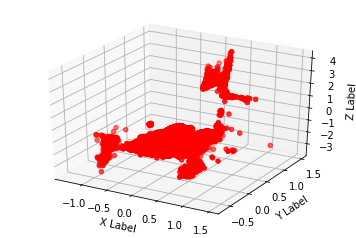

In [50]:
### Reconstruct collection of 3D points as simple 3D plot
'''Using a random set of 3D points from the Bundler output file to demonstrate visualization.'''

# choosing a random assortment of 3D points from the output file to demonstrate visualization
num_rec_points = num_points #random.randint(100,num_points)
start_point_index = 0 #random.randint(0,num_points-1)

# separate x,y,z coordinates into numpy arrays for easy plotting
for i in range(num_rec_points):
    x_3D = np.append(x_3D,points_3D[i+start_point_index,0])
    y_3D = np.append(y_3D,points_3D[i+start_point_index,1])
    z_3D = np.append(z_3D,points_3D[i+start_point_index,2])
    
# plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_3D, y_3D, z_3D, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [45]:
### Reconstruct collection of 3D points as ply or coloured pcd